In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_score,recall_score,roc_auc_score,roc_curve,f1_score

In [9]:
df=pd.read_csv('data.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [10]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

print("Feature shapes:",x.shape)
print("Class Distribution:",y.value_counts())

Feature shapes: (569, 30)
Class Distribution: diagnosis
0    357
1    212
Name: count, dtype: int64


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [14]:
model=LogisticRegression()

model.fit(x_train_scaled,y_train)

LogisticRegression()

In [18]:
y_pred=model.predict(x_test_scaled)

cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix:",cm)

precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print("Precision:",precision)
print("Recall:",recall)

y_prob=model.predict_proba(x_test_scaled)[:,1]

roc_score=roc_auc_score(y_test,y_prob)

print("ROC-AUC-Score:",roc_score)

Confusion matrix: [[71  1]
 [ 3 39]]
Precision: 0.975
Recall: 0.9285714285714286
ROC-AUC-Score: 0.996031746031746


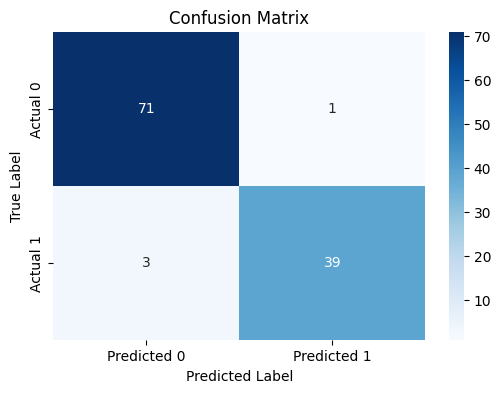

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

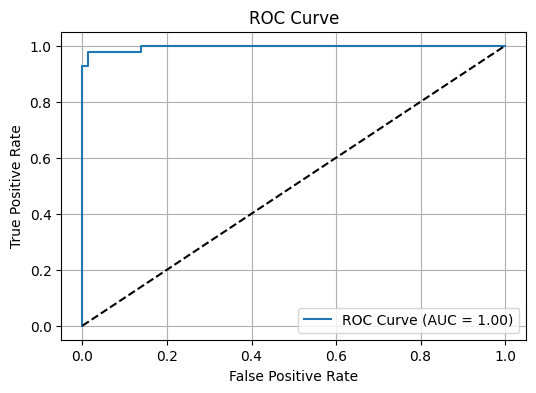

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [25]:
thresholds = np.arange(0.1, 1.0, 0.1)

print("Threshold  Precision  Recall  F1-Score")
for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)

    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    print(f"{thresh:>8.1f}  {precision:>9.2f}  {recall:>6.2f}  {f1:>8.2f}")

Threshold  Precision  Recall  F1-Score
     0.1       0.89    0.98      0.93
     0.2       0.91    0.98      0.94
     0.3       0.98    0.98      0.98
     0.4       0.98    0.95      0.96
     0.5       0.97    0.93      0.95
     0.6       1.00    0.90      0.95
     0.7       1.00    0.90      0.95
     0.8       1.00    0.86      0.92
     0.9       1.00    0.79      0.88


In [27]:
threshold = 0.3
y_pred_best = (y_prob >= threshold).astype(int)

print(f"\nEvaluation with Best Threshold = {threshold}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print(f"Precision: {precision_score(y_test, y_pred_best):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.2f}")


Evaluation with Best Threshold = 0.3
Confusion Matrix:
[[71  1]
 [ 1 41]]
Precision: 0.98
Recall: 0.98


The sigmoid function turns the model’s output into a probability between 0 and 1 showing how likely a sample belongs to the positive class.
Logistic regression predicts probabilities. we choose a threshold to separate classes.
Changing this threshold affects precision and recall.
Lowering the threshold means more positives are caught (higher recall), but might include more mistakes.
Raising the threshold means fewer mistakes (higher precision), but might miss some positives.
By trying different thresholds, we found that 0.3 works best for balancing precision and recall in your model.